In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

In [2]:

from Plotter import Plotter
from sklearn.dummy import DummyRegressor
from base_regressor import BaseRegressor
from skopt.space import Categorical

class DummyRegressorModel(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, 
                 fit_params_search=None, model_params_search=None, fit_params_train=None, 
                 model_params_train=None, name_model="DummyRegressor"):
        
        super().__init__(save_path, scaler, params, params_space, 
                         fit_params_search, model_params_search, 
                         fit_params_train, model_params_train, name_model)

        self.model_ml = DummyRegressor  # Se define el modelo dummy
        
        # Definir parámetros por defecto si no se proporcionan
        if params is None:
            self.params = {
                'strategy': 'mean'  # Otras opciones: 'median', 'constant', 'quantile'
            }

        # Definir espacio de búsqueda para estrategias dummy
        if params_space is None:
            self.params_space = {
                'strategy': Categorical(['mean', 'median', 'constant'])
            }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = DummyRegressorModel()
Plotters = Plotter()

In [5]:
import pandas as pd
import pickle

# Lista de modelos
modelos = [
    "ElasticNet", "Lasso", "Ridge", "SVRlineal",  # Modelos lineales
    "KernelRidge", "SVRkernel",  # Modelos Kernel
    "KNN", "BaggedKNN",  # Modelos KNN
    "RandomForest", "XGBoost", "CatBoost",  # Modelos basados en árboles
    "MLP"  # Redes neuronales
]

# Directorios base para resultados y SHAP
base_dir_results = "results/"
base_dir_shap = "results_model/"

# Diccionarios para almacenar los DataFrames de resultados y los valores SHAP
modelos_dataframes = {}
shap_values = {}

for modelo in modelos:
    # Leer DataFrame de resultados
    file_path_results = f"{modelo}/{base_dir_results}/df_CN_results_training.xlsx"
    modelos_dataframes[modelo] = pd.read_excel(file_path_results, engine='openpyxl')

    # Leer archivo SHAP
    file_path_shap = f"{modelo}/{base_dir_shap}/multiple_shap_summary_sorted_CN.pkl"
    with open(file_path_shap, "rb") as f:
        shap_values[modelo] = pickle.load(f)

# Ahora tienes:
# - modelos_dataframes[modelo] con los resultados de entrenamiento
# - shap_values[modelo] con los valores SHAP cargados


In [8]:
# Paleta de colores para cada modelo
colores_algoritmos = {
    "BaggedKNN": "#8B0000",  # Rojo oscuro (DarkRed)
    "KNN": "#654321",        # Marrón oscuro (DarkBrown)

    "RandomForest": "#006400", # Verde oscuro
    "XGBoost": "#228B22",       # Verde medio
    "CatBoost": "#32CD32",      # Verde lima oscuro

    "ElasticNet": "#D2691E",  # Marrón claro (Chocolate)
    "Lasso": "#FF8C00",       # Naranja oscuro
    "Ridge": "#CD853F",       # Marrón tostado
    "SVRlineal": "#DEB887",   # Beige (BurlyWood)

    "KernelRidge": "#FF69B4", # Rosado fuerte (HotPink)
    "SVRkernel": "#DB7093",   # Rosado oscuro (PaleVioletRed)

    "MLP": "#0000FF",         # Azul eléctrico

    "Dummy": "#A9A9A9"        # Gris oscuro (DarkGray)
}


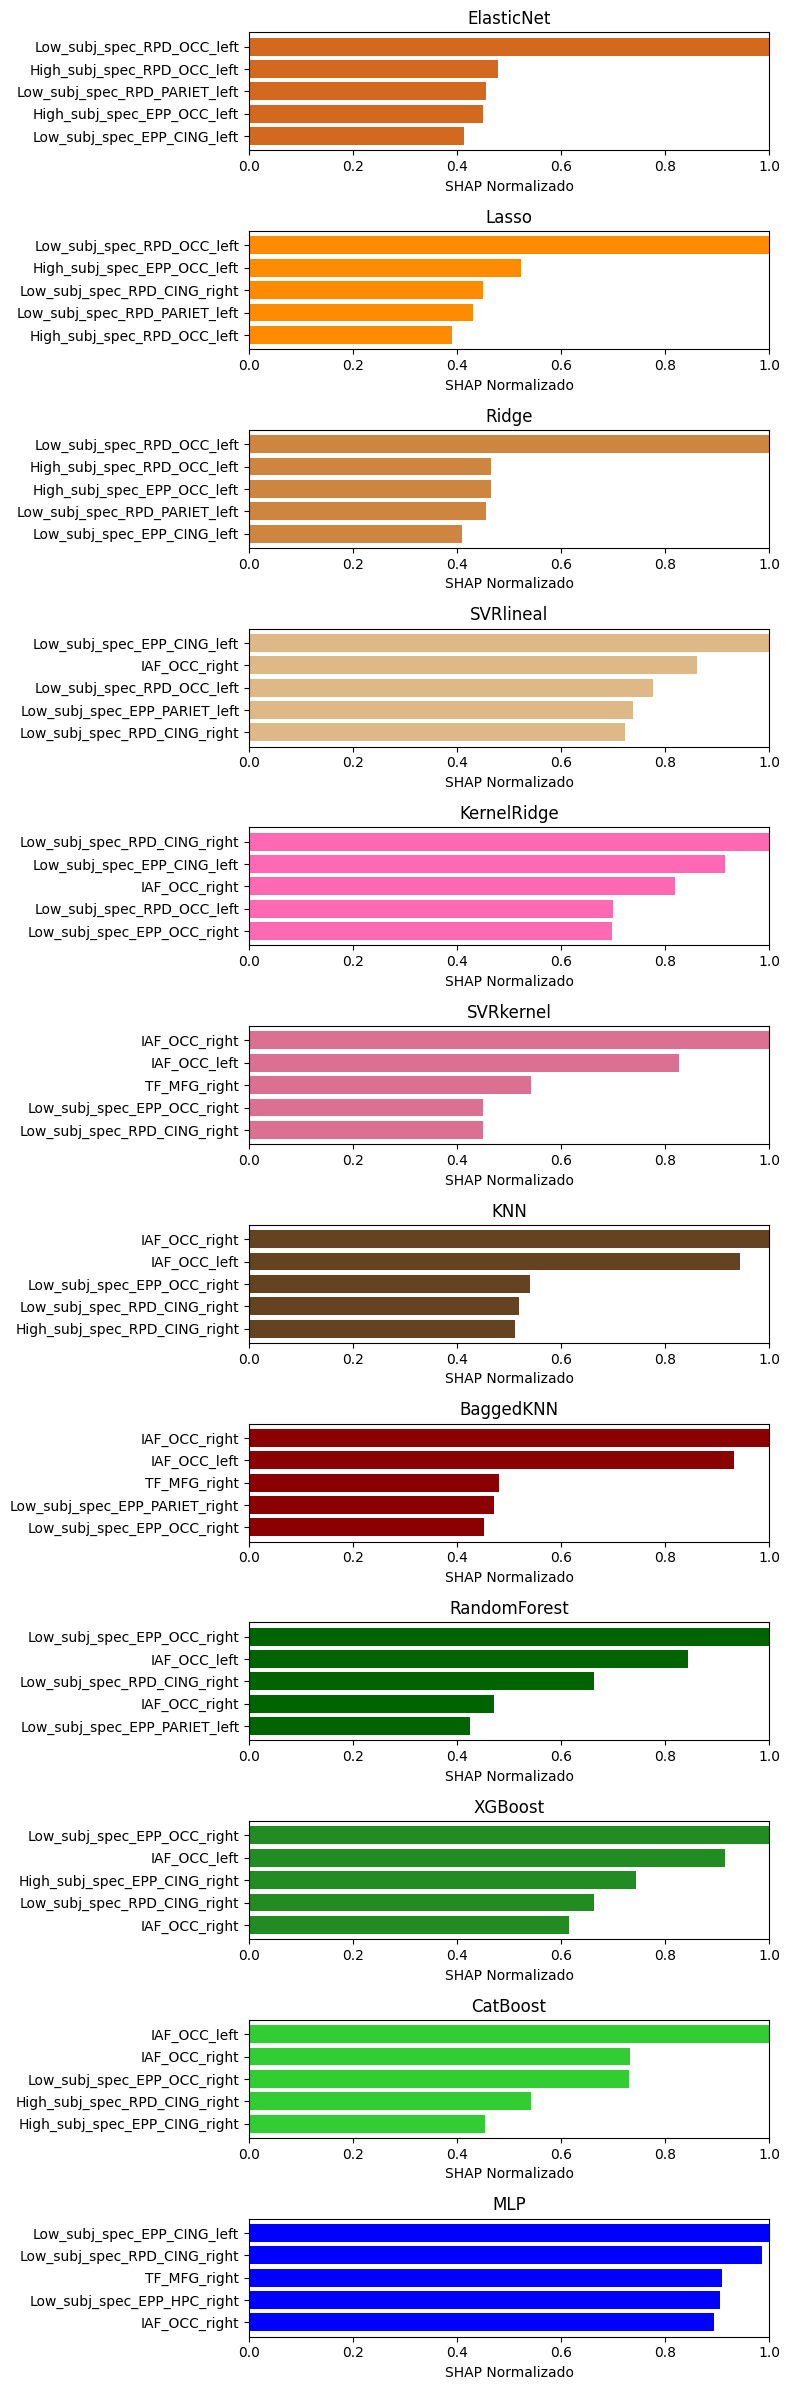

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Función para normalizar valores entre 0 y 1 con un mínimo fijo en 0
def normalize_shap_values(shap_values):
    max_val = max(value for _, value in shap_values)  # Solo usamos el máximo
    return [(feature, value / max_val) for feature, value in shap_values]  # Normalizamos con min = 0

# Normalizar los valores SHAP de cada modelo
shap_values_normalized = {modelo: normalize_shap_values(shap_list) for modelo, shap_list in shap_values.items()}

# Configurar la figura con una sola columna de subgráficos
num_models = len(shap_values_normalized)
fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=(8, 2 * num_models))

# Si hay un solo modelo, convertir axes en lista para evitar errores
if num_models == 1:
    axes = [axes]

# Generar gráfico de barras para cada modelo
for ax, (modelo, shap_list) in zip(axes, shap_values_normalized.items()):
    # Obtener los 5 principales valores SHAP normalizados
    top_shap = shap_list[:5]
    features, values = zip(*top_shap)
    
    # Graficar las barras
    ax.barh(features, values, color=colores_algoritmos.get(modelo, "gray"))
    
    ax.set_title(modelo)
    ax.set_xlim(0, 1)
    ax.invert_yaxis()  # Para que el mayor valor esté arriba
    ax.set_xlabel("SHAP Normalizado")

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


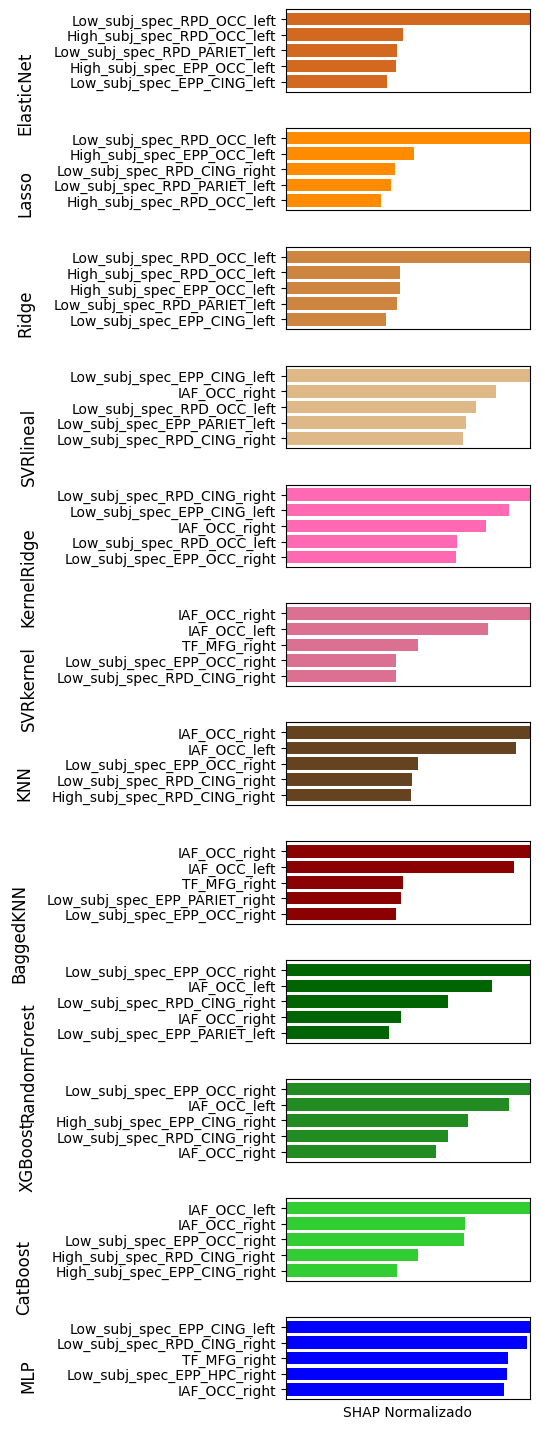

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Función para normalizar valores entre 0 y 1 con un mínimo fijo en 0
def normalize_shap_values(shap_values):
    max_val = max(value for _, value in shap_values)  # Solo usamos el máximo
    return [(feature, value / max_val) for feature, value in shap_values]  # Normalizamos con min = 0

# Normalizar los valores SHAP de cada modelo
shap_values_normalized = {modelo: normalize_shap_values(shap_list) for modelo, shap_list in shap_values.items()}

# Configurar la figura con una sola columna de subgráficos
num_models = len(shap_values_normalized)
fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=(5.5, 1.2 * num_models), sharex=True)

# Si hay un solo modelo, convertir axes en lista para evitar errores
if num_models == 1:
    axes = [axes]

# Generar gráfico de barras para cada modelo
for i, (ax, (modelo, shap_list)) in enumerate(zip(axes, shap_values_normalized.items())):
    # Obtener los 5 principales valores SHAP normalizados
    top_shap = shap_list[:5]
    features, values = zip(*top_shap)
    
    # Graficar las barras
    ax.barh(features, values, color=colores_algoritmos.get(modelo, "gray"))
    
    # Ocultar etiquetas del eje X en todos los gráficos excepto el último
    if i < num_models - 1:
        ax.set_xticklabels([])
        ax.set_xticks([])

    # Mover el nombre del modelo al eje Y
    ax.set_ylabel(modelo, rotation=90, labelpad=20, fontsize=12, ha="right", va="center")
    #ax.set_xlabel(modelo, rotation=0, labelpad=10, fontsize=12, ha="center", va="center")

    ax.set_xlim(0, 1)
    ax.invert_yaxis()  # Para que el mayor valor esté arriba

# Solo el último gráfico tendrá etiqueta en X
axes[-1].set_xlabel("SHAP Normalizado")

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

OCC_left: 1.000000
CING_left: 0.560693
HPC_left: 0.329744
PARIET_left: 0.300891
CING_right: 0.165163
PARIET_right: 0.132854
HPC_right: 0.127056
OCC_right: 0.094991
MFG_right: 0.090020
INS_right: 0.089207


c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


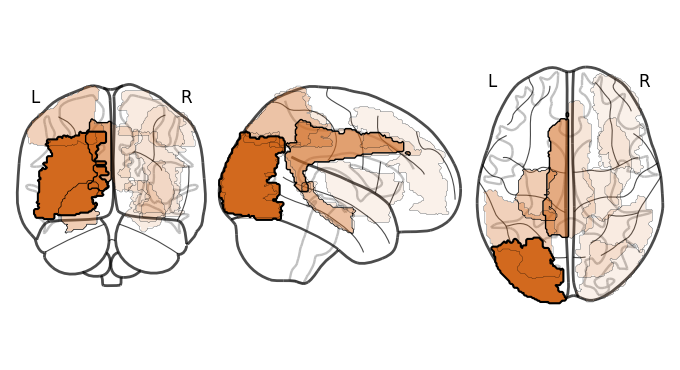

OCC_left: 1.000000
CING_left: 0.386207
PARIET_left: 0.272143
HPC_left: 0.255972
HPC_right: 0.191158
CING_right: 0.176992
PARIET_right: 0.095113
OCC_right: 0.091171
MFG_right: 0.081429
INS_right: 0.078621


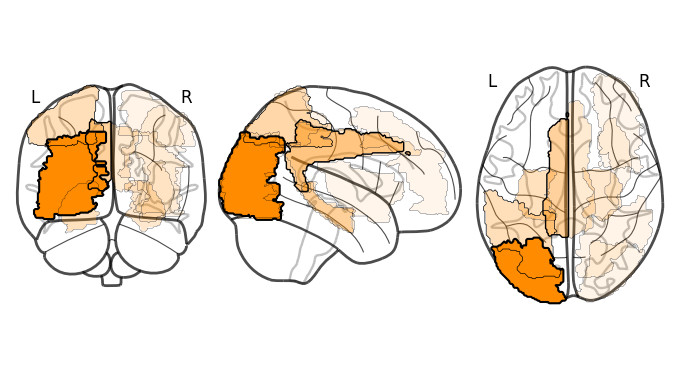

OCC_left: 1.000000
CING_left: 0.558280
HPC_left: 0.326853
PARIET_left: 0.299066
CING_right: 0.162985
PARIET_right: 0.132703
HPC_right: 0.126067
OCC_right: 0.094098
MFG_right: 0.089153
INS_right: 0.088329


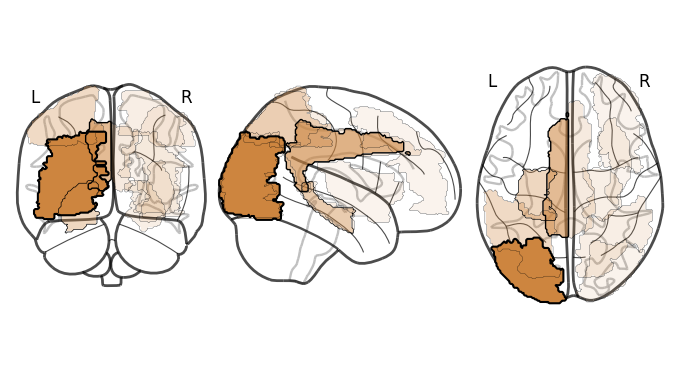

OCC_left: 1.000000
CING_left: 0.624356
OCC_right: 0.509813
PARIET_left: 0.315774
CING_right: 0.309061
MFG_right: 0.288188
IFG_right: 0.283249
HPC_left: 0.246585
ORB_right: 0.245820
HPC_right: 0.227857
INS_right: 0.204828
SFG_right: 0.185024
ORB_left: 0.171955
SFG_left: 0.161512
INS_left: 0.154241


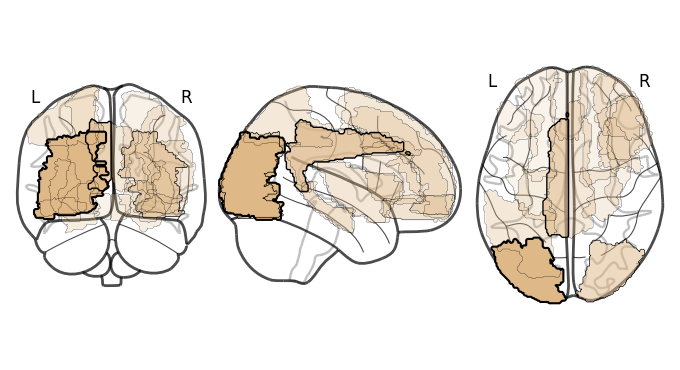

CING_right: 1.000000
OCC_left: 0.566395
OCC_right: 0.534450
HPC_right: 0.435452
CING_left: 0.322420
PARIET_left: 0.275252
MFG_right: 0.228254
INS_right: 0.165761
INS_left: 0.148568
PARIET_right: 0.139715
ORB_left: 0.135674


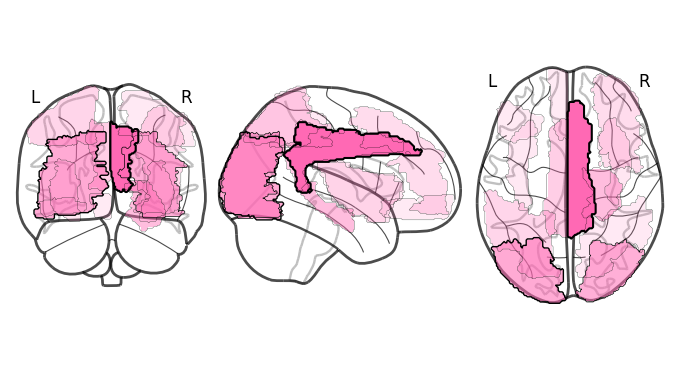

CING_right: 1.000000
OCC_right: 0.948928
PARIET_right: 0.857358
OCC_left: 0.722249
MFG_right: 0.354660
INS_left: 0.349268
PARIET_left: 0.231848
HPC_left: 0.201122
CING_left: 0.186577
ORB_right: 0.184683


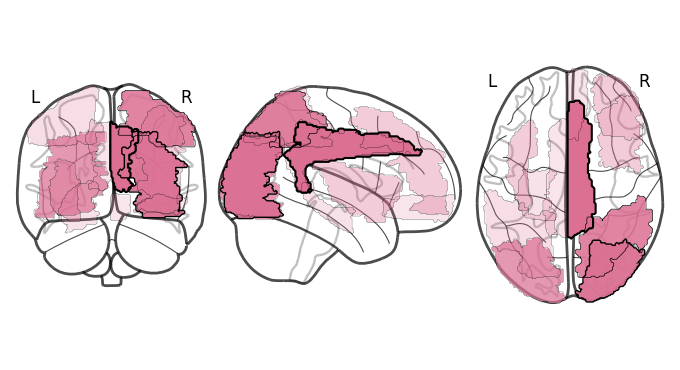

CING_right: 1.000000
HPC_left: 0.982584
CING_left: 0.833372
OCC_right: 0.755401
OCC_left: 0.462823
PARIET_right: 0.248620
MFG_right: 0.221158
PARIET_left: 0.220277
INS_left: 0.205622


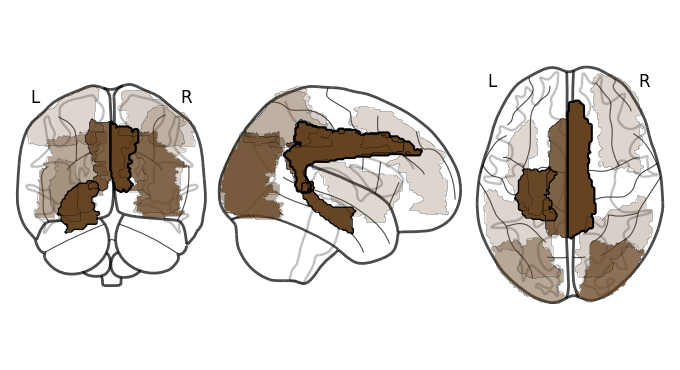

CING_right: 1.000000
OCC_right: 0.876230
PARIET_right: 0.672695
OCC_left: 0.563127
HPC_left: 0.447525
CING_left: 0.417475
HPC_right: 0.392242
MFG_right: 0.290346
PARIET_left: 0.267901
INS_left: 0.244249
ORB_right: 0.224190


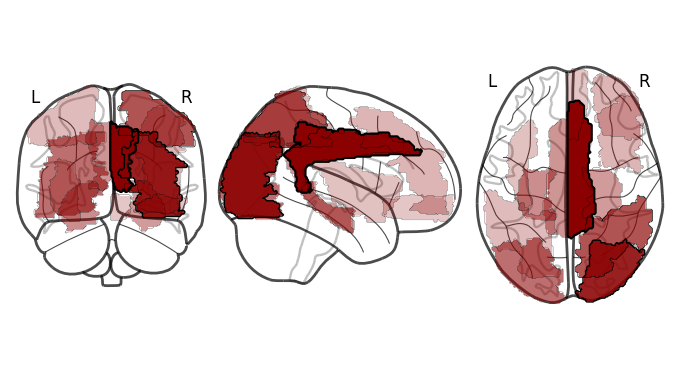

CING_right: 1.000000
OCC_right: 0.920555
OCC_left: 0.657195
PARIET_left: 0.551880
HPC_left: 0.511547
HPC_right: 0.153283
PARIET_right: 0.134452
CING_left: 0.115066
INS_left: 0.075639


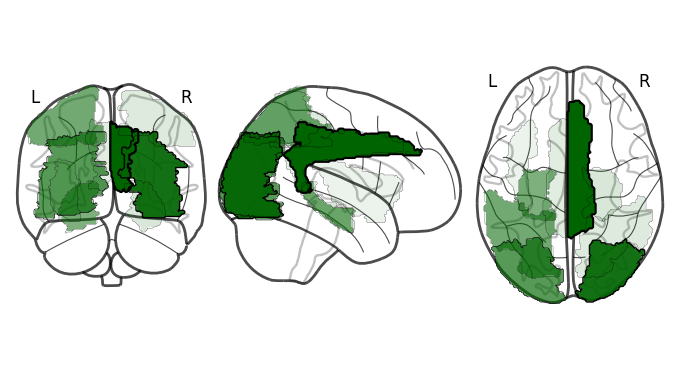

CING_right: 1.000000
OCC_right: 0.817339
OCC_left: 0.615695
PARIET_left: 0.560871
HPC_left: 0.448530
PARIET_right: 0.266049
HPC_right: 0.231602
CING_left: 0.093154


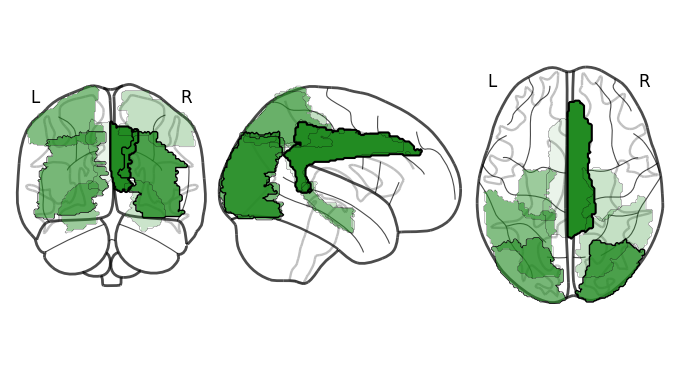

CING_right: 1.000000
OCC_right: 0.896098
HPC_left: 0.788988
OCC_left: 0.612824
PARIET_left: 0.522297
CING_left: 0.318281
PARIET_right: 0.182218
HPC_right: 0.103861


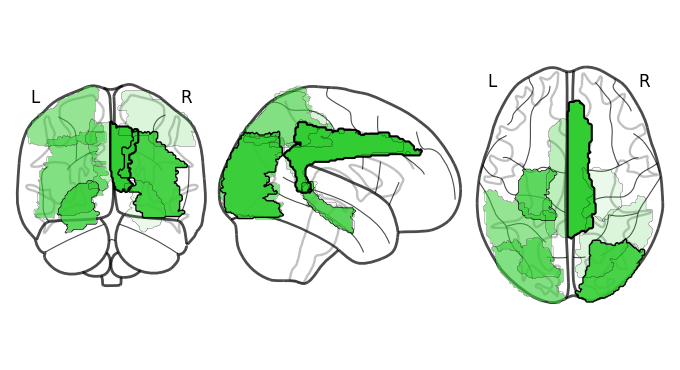

OCC_left: 1.000000
CING_right: 0.908841
OCC_right: 0.701635
CING_left: 0.592136
MFG_right: 0.350574
HPC_right: 0.349766
INS_right: 0.262891
IFG_right: 0.215974
ORB_left: 0.195659
PARIET_left: 0.176127
MFG_left: 0.163792
ORB_right: 0.155184


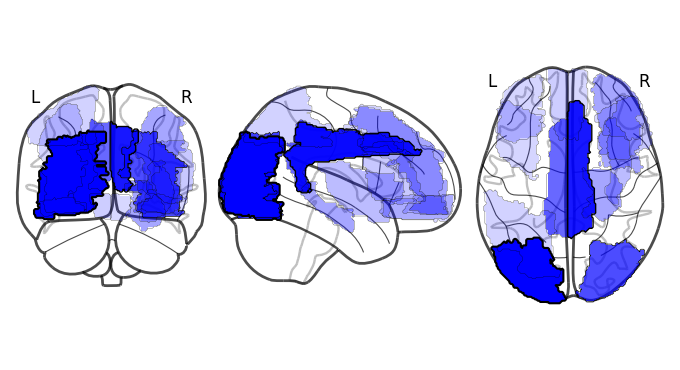

In [25]:
# Asumiendo que 'shap_summary_sorted_CN' contiene los valores SHAP ordenados para el modelo "CN" (y otros modelos también),
# y 'colores_algoritmos' es un diccionario que tiene los colores para cada modelo.
for modelo, shap_summary_sorted in shap_values_normalized.items():
    # Llamada a la función shap_region con los valores SHAP de cada modelo
    shap_por_region_sorted, resultado_normalizado_sorted = model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)
    
    # Definir el color del gráfico de acuerdo al modelo actual
    color = colores_algoritmos.get(modelo, "gray")  # Usa "gray" como color por defecto si no se encuentra el modelo
    
    # Definir la ruta base donde se guardará la imagen
    base_path = f'{path}cerebritos/'
    
    # Generar el gráfico usando Plotters.plot_brain_regions con los resultados normalizados y el color del modelo
    Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=color)
